# USPS Handwritten Digit Classification

This notebook implements Decision Tree, K-Nearest Neighbors (from scratch), and Multiclass SVM models to classify USPS handwritten digits. It also provides automated insights into model performance.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Add src to path
sys.path.append(os.path.abspath('../src'))

from data_preprocessing import load_data
from decision_tree import train_evaluate_dt
from knn import train_evaluate_knn
from svm import train_evaluate_svm
from analysis import analyze_results

## Data Loading

In [2]:
# Load data from the new location
features, labels = load_data('../data/USPS_all.mat')

## Decision Tree Model


DECISION TREE MODEL
Decision Tree Structure:
|--- pixel_66 <= -0.67
|   |--- pixel_188 <= -0.90
|   |   |--- pixel_55 <= -0.90
|   |   |   |--- pixel_194 <= -0.75
|   |   |   |   |--- pixel_102 <= -1.07
|   |   |   |   |   |--- class: 8
|   |   |   |   |--- pixel_102 >  -1.07
|   |   |   |   |   |--- pixel_117 <= -1.07
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- pixel_117 >  -1.07
|   |   |   |   |   |   |--- class: 3
|   |   |   |--- pixel_194 >  -0.75
|   |   |   |   |--- class: 5
|   |   |--- pixel_55 >  -0.90
|   |   |   |--- pixel_199 <= -1.05
|   |   |   |   |--- class: 7
|   |   |   |--- pixel_199 >  -1.05
|   |   |   |   |--- pixel_36 <= -1.15
|   |   |   |   |   |--- pixel_184 <= 0.50
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- pixel_184 >  0.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- pixel_36 >  -1.15
|   |   |   |   |   |--- pixel_12 <= -0.59
|   |   |   |   |   |   |--- pixel_230 <= -1.56
|   |   |   |   |   |   |   

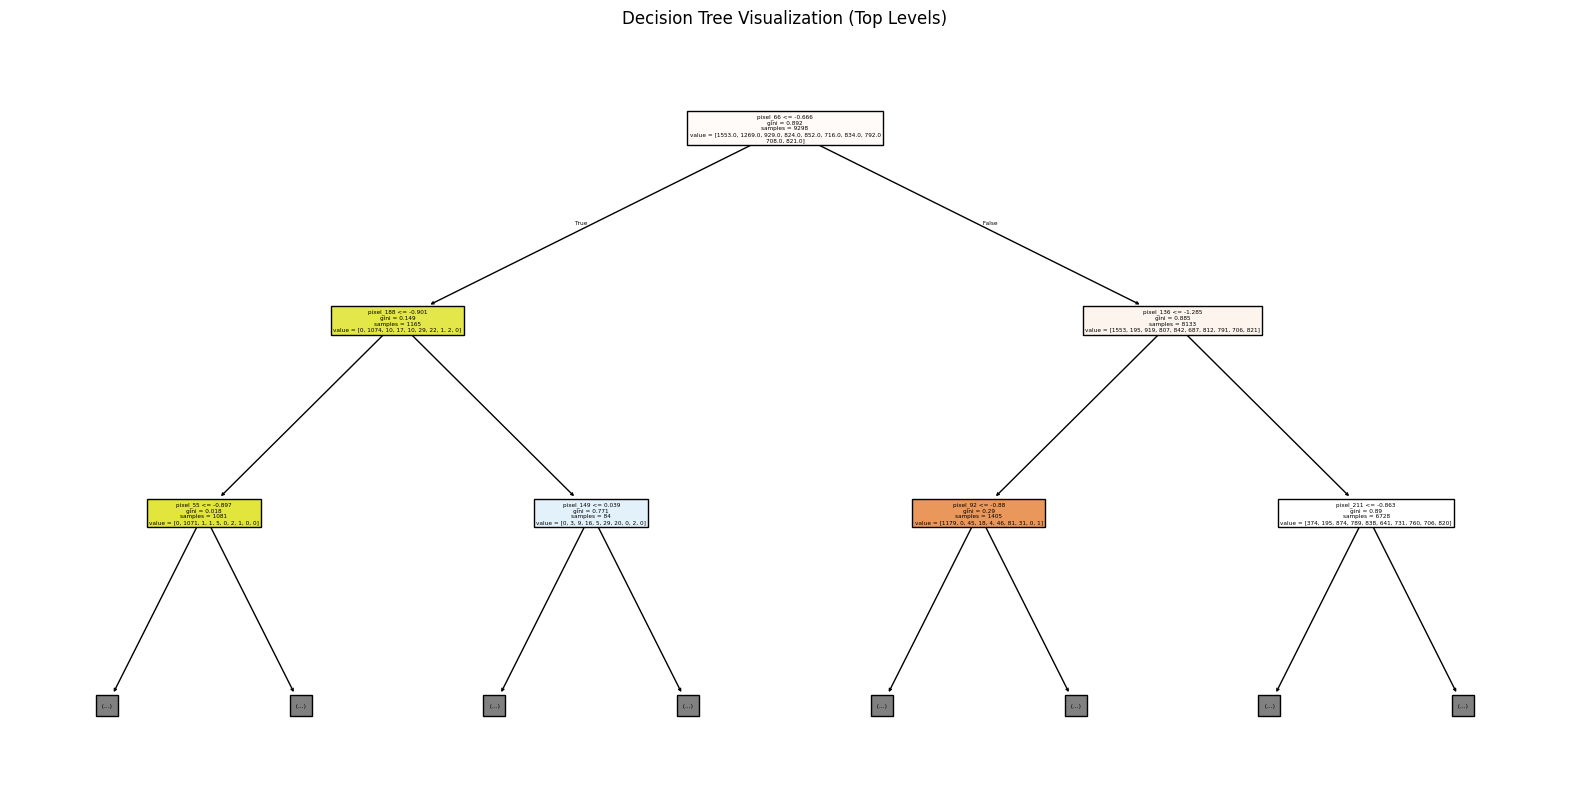

Config: {}, Accuracy Rate: 88.69%, F1 Score: 0.8752, Training Time: 32.2993s


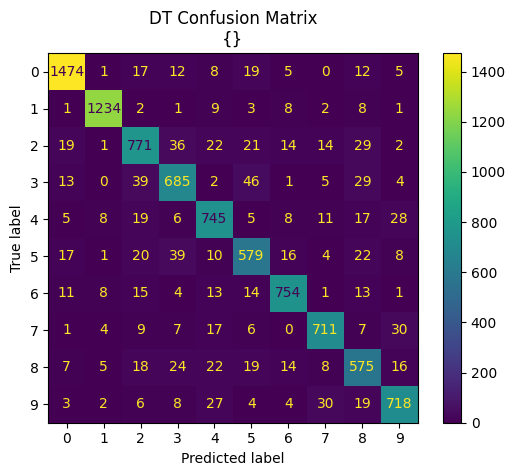

Config: {'max_leaf_nodes': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}, Accuracy Rate: 73.33%, F1 Score: 0.7183, Training Time: 14.8476s


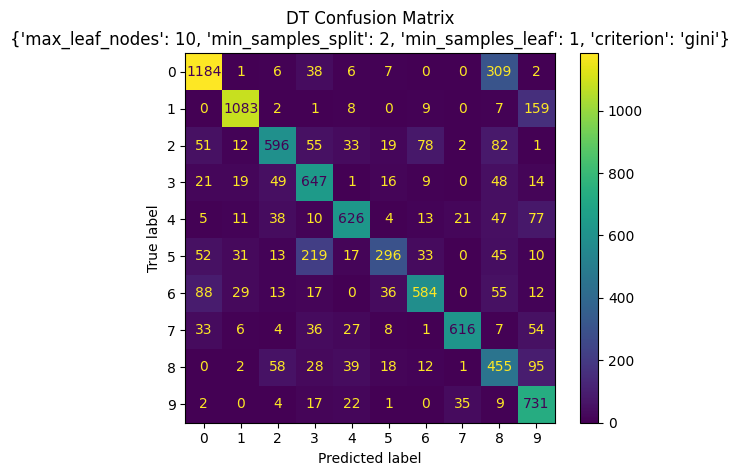

Config: {'max_leaf_nodes': None, 'min_samples_split': 10, 'min_samples_leaf': 1, 'criterion': 'gini'}, Accuracy Rate: 88.46%, F1 Score: 0.8726, Training Time: 31.9310s


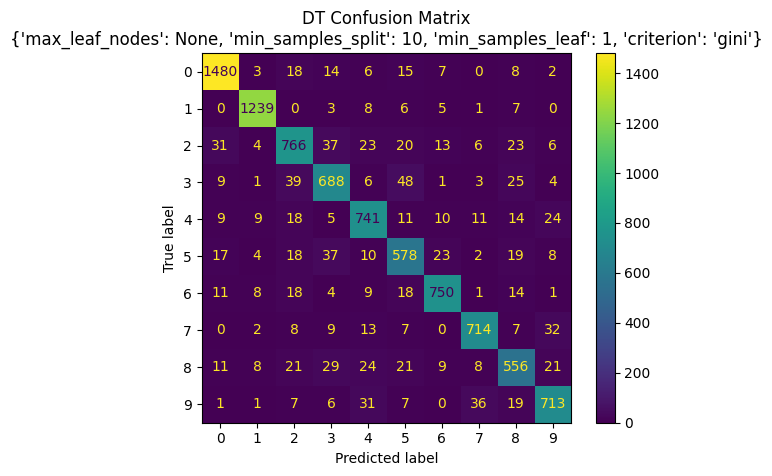

Config: {'max_leaf_nodes': None, 'min_samples_split': 2, 'min_samples_leaf': 5, 'criterion': 'gini'}, Accuracy Rate: 88.90%, F1 Score: 0.8777, Training Time: 28.8166s


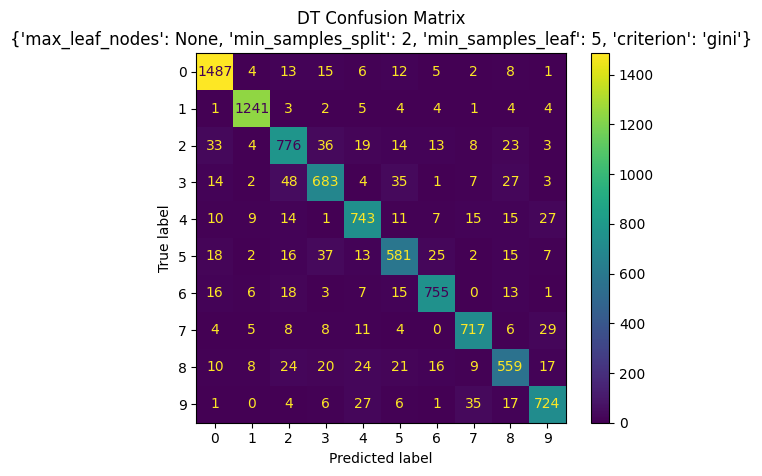

Config: {'max_leaf_nodes': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}, Accuracy Rate: 89.42%, F1 Score: 0.8836, Training Time: 37.2899s


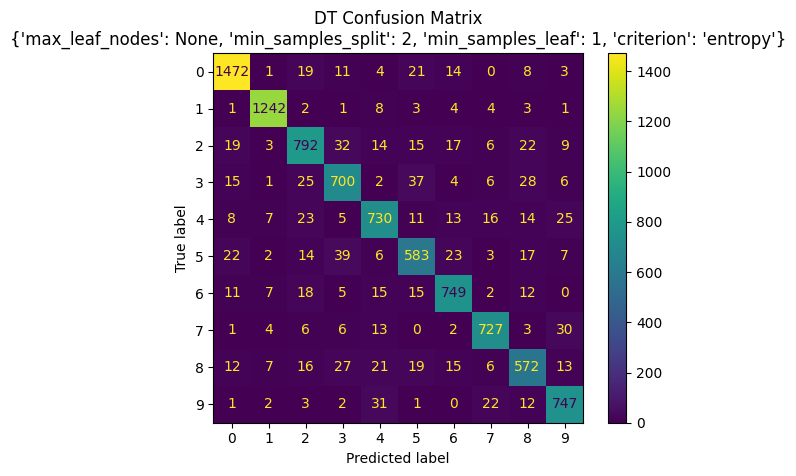

In [3]:
dt_results = train_evaluate_dt(features, labels)

## K-Nearest Neighbors


K-NEAREST NEIGHBORS MODEL
k=1, weights='distance', Accuracy Rate: 96.60%, F1 Score: 0.9626, Training Time: 0.8234s


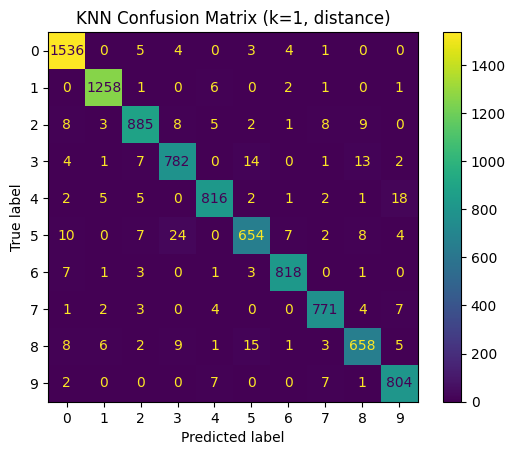

k=3, weights='distance', Accuracy Rate: 96.64%, F1 Score: 0.9630, Training Time: 0.5050s


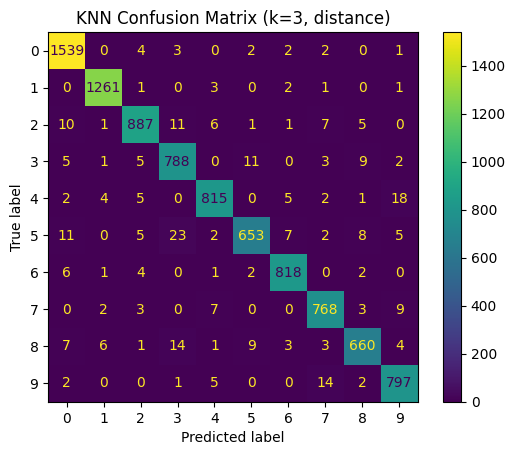

k=5, weights='distance', Accuracy Rate: 96.62%, F1 Score: 0.9629, Training Time: 0.7045s


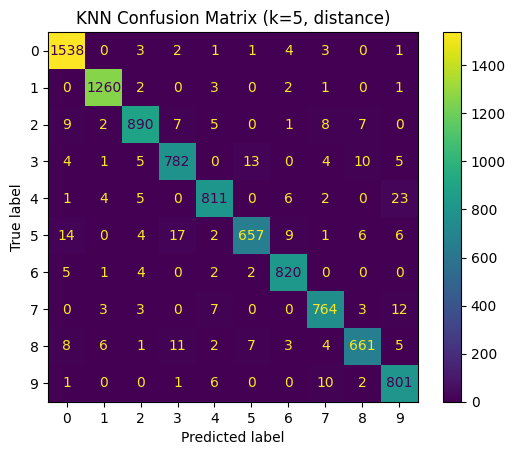

k=7, weights='distance', Accuracy Rate: 96.34%, F1 Score: 0.9597, Training Time: 0.7538s


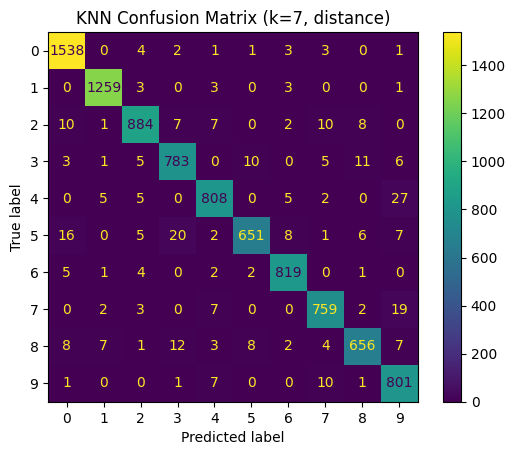

k=3, weights='uniform', Accuracy Rate: 96.48%, F1 Score: 0.9616, Training Time: 0.4714s


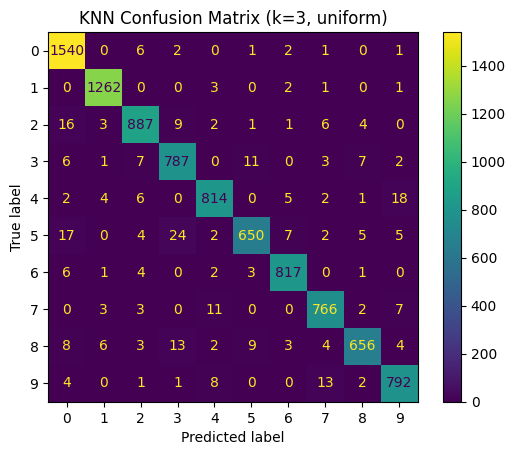

In [4]:
knn_results = train_evaluate_knn(features, labels)

## Support Vector Machine Model


SUPPORT VECTOR MACHINE MODEL
Config: {'kernel': 'linear', 'decision_function_shape': 'ovr'}, Accuracy Rate: 95.06%, F1 Score: 0.9460, Training Time: 9.8894s


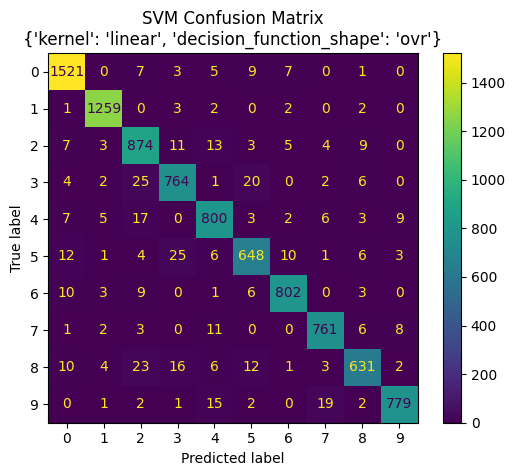

Config: {'kernel': 'poly', 'decision_function_shape': 'ovr', 'degree': 2}, Accuracy Rate: 96.82%, F1 Score: 0.9653, Training Time: 19.1002s


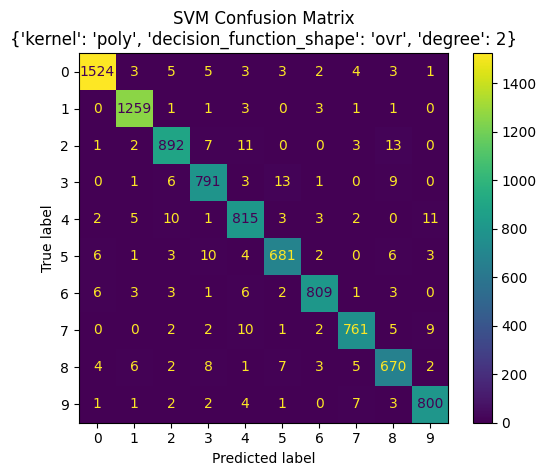

Config: {'kernel': 'poly', 'decision_function_shape': 'ovr', 'degree': 3}, Accuracy Rate: 96.90%, F1 Score: 0.9658, Training Time: 23.1253s


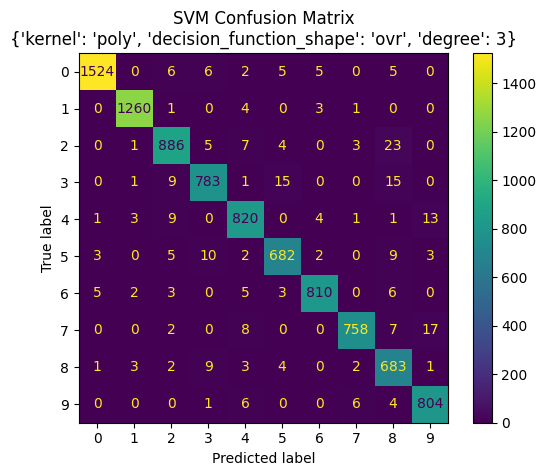

In [5]:
svm_results = train_evaluate_svm(features, labels)

## Main Execution

In [ ]:
all_results = []

all_results.extend(dt_results)
all_results.extend(knn_results)
all_results.extend(svm_results)

print("\n--- Final Comparison ---")
# Group by model
model_groups = {}
for res in all_results:
    model = res['model']
    if model not in model_groups:
        model_groups[model] = []
    model_groups[model].append(res)
    
for model, res_list in model_groups.items():
    print(f"\nModel: {model}")
    for res in res_list:
        print(f"  Config: {res['config']}")
        print(f"  Accuracy Rate: {res['accuracy']:.2%}")
        print(f"  Training Time: {res['time']:.4f}s")
        print(f"  F1 Score: {res['f1_score']:.4f}")

analyze_results(all_results)


--- Final Comparison ---

Model: Decision Tree
  Config: {}
  Accuracy Rate: 88.69%
  Training Time: 32.2993s
  Config: {'max_leaf_nodes': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'}
  Accuracy Rate: 73.33%
  Training Time: 14.8476s
  Config: {'max_leaf_nodes': None, 'min_samples_split': 10, 'min_samples_leaf': 1, 'criterion': 'gini'}
  Accuracy Rate: 88.46%
  Training Time: 31.9310s
  Config: {'max_leaf_nodes': None, 'min_samples_split': 2, 'min_samples_leaf': 5, 'criterion': 'gini'}
  Accuracy Rate: 88.90%
  Training Time: 28.8166s
  Config: {'max_leaf_nodes': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}
  Accuracy Rate: 89.42%
  Training Time: 37.2899s

Model: KNN
  Config: {'k': 1, 'weights': 'distance'}
  Accuracy Rate: 96.60%
  Training Time: 0.8234s
  Config: {'k': 3, 'weights': 'distance'}
  Accuracy Rate: 96.64%
  Training Time: 0.5050s
  Config: {'k': 5, 'weights': 'distance'}
  Accuracy Rate: 96.62%
  Training Time